**NAME** : SMRITI TRIPATHI

**ROLL NUMBER** : 200988

**QUESTION 1**


To compute the gradient ( $\nabla \ln \pi(A_t|S_t, \theta) $) for the policy shown above, let's start by expressing the policy ( $\pi(A_t|S_t, \theta) $) using the softmax function:


$
\pi(A_t|S_t, \theta) = \frac{\exp(\theta_{A_t}^T S_t)}{\sum_{a'} \exp(\theta_{a'}^T S_t)}
$

Where:
- $A_t$ is the action taken at time step t.
- $S_t$ is the state feautures vector (consisting of 4 features of a state)  at time step t.
- $\theta_{A_t} $ is a vector of policy parameters corresponding to action $A_t$.
- $\theta_{a'}$ represents all policy parameters corresponding to all actions $a'$ (Left or Right).

Now, let's take the natural logarithm of the policy:

$
\ln \pi(A_t|S_t, \theta) = \ln \left( \frac{\exp(\theta_{A_t}^T S_t)}{\sum_{a'} \exp(\theta_{a'}^T S_t)} \right)
\$

In order to simplify the calculations, we can look at both the actions (Left or Right) seperately:
- **Left Action** :
$
\ln \pi(LEFT|S_t) = \ln \left( \frac{\exp(\theta_{left}^T S_t)}{\exp(\theta_{left}^T S_t) + \exp(\theta_{right}^T S_t) } \right)
\$

- **Right Action** :
$
\ln \pi(RIGHT|S_t) = \ln \left( \frac{\exp(\theta_{right}^T S_t)}{\exp(\theta_{left}^T S_t) + \exp(\theta_{right}^T S_t) } \right)
\$

Using the properties of logarithms, we can simplify the above expressions:
- **Left Action** :
$
\ln \pi(LEFT|S_t) = \theta_{left}^T S_t - \ln \left( \exp(\theta_{left}^T S_t) + \exp(\theta_{right}^T S_t) \right)
\$

- **Right Action** :
$
\ln \pi(RIGHT|S_t) = \theta_{right}^T S_t - \ln \left( \exp(\theta_{left}^T S_t) + \exp(\theta_{right}^T S_t) \right)
\$

Now, let's compute the gradient of this expression with respect to $\theta$:

- **Left Action** :
$
\nabla \ln \pi(LEFT|S_t) = \frac{\partial}{\partial \theta_{left}} \left( \theta_{left}^T S_t - \ln \left( \exp(\theta_{left}^T S_t) + \exp(\theta_{right}^T S_t) \right) \right)$

- **Right Action** :
$
\nabla \ln \pi(RIGHT|S_t) = \frac{\partial}{\partial \theta_{right}} \left( \theta_{right}^T S_t - \ln \left( \exp(\theta_{left}^T S_t) + \exp(\theta_{right}^T S_t) \right) \right)$


Since  $\nabla \left( \theta_{A_t}^T S_t \right) = S_t $ for the chosen action $A_t$, we can further simplify and get:

- **Left Action** :
$
\nabla \ln \pi(LEFT|S_t) = S_t - \left( \frac{\exp(\theta_{left}^T S_t)}{\exp(\theta_{left}^T S_t) + \exp(\theta_{right}^T S_t) } \right)   \cdot S_t
$

- **Right Action** :
$
\nabla \ln \pi(RIGHT|S_t) = S_t - \left( \frac{\exp(\theta_{right}^T S_t)}{\exp(\theta_{left}^T S_t) + \exp(\theta_{right}^T S_t) } \right)   \cdot S_t
$

So, the final simplified expression is:

- **Left Action** :
$
\nabla \ln \pi(LEFT|S_t) = (1 - \pi(LEFT|S_t)) \cdot S_t
$

- **Right Action** :
$
\nabla \ln \pi(RIGHT|S_t) = (1 - \pi(RIGHT|S_t)) \cdot S_t
$


This is the expression for the gradient $\nabla \ln \pi(A_t|S_t, \theta)$ for the given policy.


**QUESTION 2**

In [1]:
import numpy as np
import gym

# Define Policy
def softmax(x):
    exp_x = np.exp(x-np.max(x)) #Subtract max value to avoid overflow
    return exp_x / exp_x.sum()

def policy(state, theta):
    logits = np.dot(theta, state)
    return softmax(logits)

# Generate an episode
def generate_episode(env, theta):
    states = []
    actions = []
    rewards = []
    state = env.reset()
    for _ in range(500):  # Limit to 500 steps
        action_probs = policy(state, theta)
        action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
        next_state, reward,done, _ = env.step(action)
        states.append(state)
        actions.append(action)
        rewards.append(reward)
        if done:
            break  # End episode if done
        state = next_state
    return states, actions, rewards

# Compute Gt
def compute_return(rewards, gamma):
    G = 0
    returns = []
    for reward in reversed(rewards):
        G = reward + gamma * G
        returns.insert(0, G)
    return returns

# Update theta
def update_theta(theta, states, actions, returns, alpha, gamma):
    for state, action, G in zip(states, actions, returns):
        grad_log_pi = np.outer(1 - policy(state, theta), state)
        theta[action] += alpha * G * gamma * grad_log_pi[action]
    return theta

# Algorithm Parameters
alpha = 0.01  # Step size
gamma = 0.99  # Discount factor
theta = np.zeros((2, 4))  # Initialize policy parameter

# Initialize Gym environment
env = gym.make('CartPole-v1')

# Generate 1 episode with 500 steps
states, actions, rewards = generate_episode(env, theta)
returns = compute_return(rewards, gamma)
theta = update_theta(theta, states, actions, returns, alpha,gamma)


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


**QUESTION 3**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


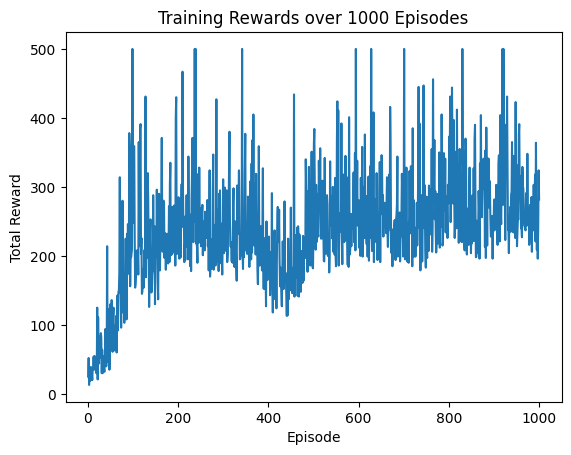

In [2]:
import matplotlib.pyplot as plt

episode_rewards_reinforce = []

# Training Loop
num_episodes = 1000
for episode in range(num_episodes):
    states, actions, rewards = generate_episode(env, theta)
    returns = compute_return(rewards, gamma)
    theta = update_theta(theta, states, actions, returns, alpha, gamma)
    episode_rewards_reinforce.append(sum(rewards))

# Plot training rewards
plt.plot(range(1, num_episodes + 1), episode_rewards_reinforce)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Training Rewards over 1000 Episodes')
plt.show()

**QUESTION 4**

In [3]:
# Test the trained policy
def test_policy(env, theta, num_episodes):
    total_rewards = []
    for _ in range(num_episodes):
        episode_rewards = 0
        state = env.reset()
        done = False
        while not done:
            action_probs = policy(state, theta)
            action = np.argmax(action_probs)  # Choose action with highest probability
            next_state, reward, done, _ = env.step(action)
            episode_rewards += reward
            state = next_state
        total_rewards.append(episode_rewards)
    return total_rewards

# Test the policy on 5 episodes
num_test_episodes = 5
test_rewards = test_policy(env, theta, num_test_episodes)

# Compute average reward
average_reward = np.mean(test_rewards)

print("Average reward over 5 episodes:", average_reward)


Average reward over 5 episodes: 241.8


**QUESTION 5**

In [4]:
import numpy as np
import gym

# Define Policy
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

def policy(state, theta):
    logits = np.dot(theta, state)
    return softmax(logits)

# Generate an episode following policy pi
def generate_episode(env, theta):
    states = []
    actions = []
    rewards = []
    state = env.reset()
    for _ in range(500):  # Limit to 500 steps
        action_probs = policy(state, theta)
        action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
        next_state, reward, done, _ = env.step(action)
        states.append(state)
        actions.append(action)
        rewards.append(reward)
        if done:
            break  # End episode if done
        state = next_state
    return states, actions, rewards

# Compute Gt
def compute_return(rewards, gamma):
    G = 0
    returns = []
    for reward in reversed(rewards):
        G = reward + gamma * G
        returns.insert(0, G)
    return returns

# Update theta
def update_theta(theta, states, actions, returns, alpha, gamma, w):
    for state, action, G in zip(states, actions, returns):
        grad_log_pi = np.outer(1 - policy(state, theta), state)
        theta[action] += alpha * (G - np.dot(w, state)) * gamma * grad_log_pi[action]
    return theta

# Update state-value weights w
def update_w(w, states, returns, alpha_w):
    for state, G in zip(states, returns):
        w -= alpha_w * np.dot((G - np.dot(w, state)), state)
    return w

# Algorithm Parameters
alpha = 0.01  # Step size for theta
alpha_w = 0.01  # Step size for w
gamma = 0.99  # Discount factor
theta = np.zeros((2, 4))  # Initialize policy parameter
w = np.zeros(4)  # Initialize state-value weights

# Initialize Gym environment
env = gym.make('CartPole-v1')

# Generate 1 episode with 500 steps
states, actions, rewards = generate_episode(env, theta)
returns = compute_return(rewards, gamma)
w = update_w(w, states, returns, alpha_w)
theta = update_theta(theta, states, actions, returns, alpha, gamma, w)


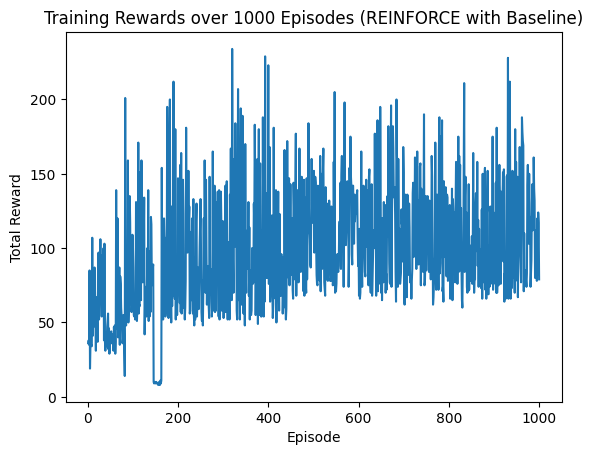

In [5]:
episode_rewards_baseline = []

# Training Loop
num_episodes = 1000
for episode in range(num_episodes):
    states, actions, rewards = generate_episode(env, theta)
    returns = compute_return(rewards, gamma)
    w = update_w(w, states, returns, alpha_w)
    theta = update_theta(theta, states, actions, returns, alpha,gamma,w)
    episode_rewards_baseline.append(sum(rewards))

# Plot training rewards
plt.plot(range(1, num_episodes + 1), episode_rewards_baseline)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Training Rewards over 1000 Episodes (REINFORCE with Baseline)')
plt.show()

**QUESTION 6**

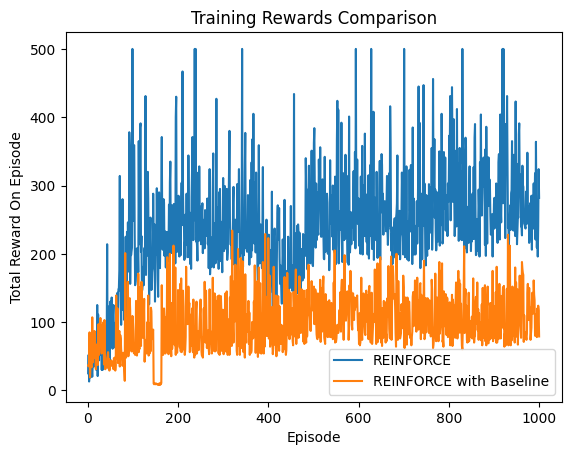

In [7]:
# Plot training rewards for both algorithms
plt.plot(range(1, num_episodes + 1), episode_rewards_reinforce, label='REINFORCE')
plt.plot(range(1, num_episodes + 1), episode_rewards_baseline, label='REINFORCE with Baseline')
plt.xlabel('Episode')
plt.ylabel('Total Reward On Episode')
plt.title('Training Rewards Comparison')
plt.legend()
plt.show()